In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%store -r countsdf
%store -r final

# Question
## What affect does the number of Directors and Writers play on a films total gross and budget?

First, we'll take a look at our overall data set to see how our distribution looks

In [4]:
countsdf['directorCount'].value_counts()

1     4700
2      403
3       34
4       10
5        5
6        4
10       3
8        3
7        2
13       2
9        2
34       1
12       1
Name: directorCount, dtype: int64

In [9]:
countsdf.groupby(['directorCount'])['writerCount'].mean()

directorCount
1      1.968085
2      2.344913
3      3.176471
4      2.800000
5      4.800000
6      6.000000
7      6.000000
8      2.333333
9      7.000000
10     7.666667
12    15.000000
13    15.500000
34     1.000000
Name: writerCount, dtype: float64

In [5]:
countsdf['writerCount'].value_counts()

1     2456
2     1422
3      693
4      290
5      158
6       62
7       35
8       19
9       13
10      10
11       5
13       2
12       1
15       1
20       1
14       1
25       1
Name: writerCount, dtype: int64

Looking at our value counts we can see that we start to get fewer amounts of data as our number of directors and writers rise. For this reason we will only be looking at films with 5 or fewer directors and 10 or fewer writers.

In [4]:
refinedcounts = countsdf[(countsdf.directorCount < 6) & (countsdf.writerCount < 11)]

## A Glimpse of our Core Data 

Text(0.5, 1.0, 'Comparison of Amount of Data for Each Value of Directors and Writers')

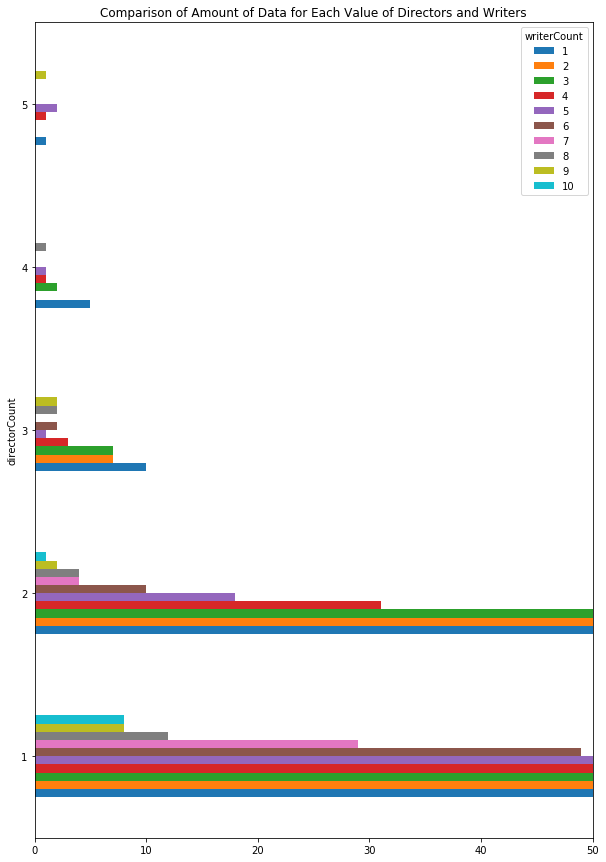

In [10]:
fig, ax = plt.subplots(figsize = (10,15))
ax.set_xlim([0,50])
refinedcounts.groupby(['directorCount', 'writerCount']).count()['worldwide_gross'].unstack().plot(kind = 'barh', ax=ax)
plt.title('Comparison of Amount of Data for Each Value of Directors and Writers')

This graph shows that despite how many writers a film may have, we don't have a whole lot of data for films with more than 3 to 4 directors. We'll keep this in mind as we look at our next few charts.

In [8]:
refinedcounts = refinedcounts[(refinedcounts.directorCount < 4)]

## Crew Sizes and Performance

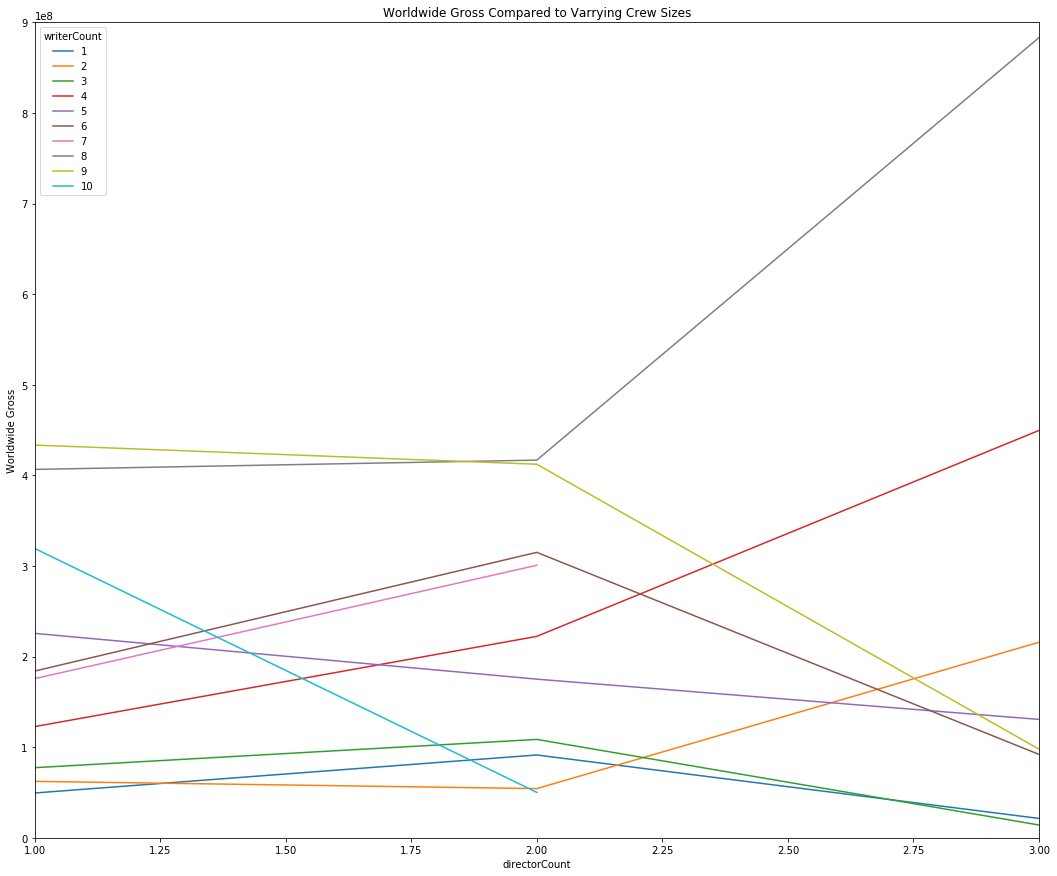

In [9]:
fig, ax = plt.subplots(figsize = (18,15))
ax.set_ylim([0 ,900000000])
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross Compared to Varrying Crew Sizes')
refinedcounts.groupby(['directorCount', 'writerCount']).mean()['worldwide_gross'].unstack().plot(ax=ax)

From here we can see that films having 3 directors and 4 or 8 writers have some great financial performance. However, our previous chart shows that our data for films with this unique matchup isn't quite ample enough to predict future films performances from. The same can be said for films with 9 writers. While we didn't have much data for 4 writers and 3 directors, we did have increasing values for 4 writers and 1 or 2 directors. It's possible that having 4 writers on a film may be our sweet spot.

In [10]:
refinedcounts = refinedcounts[(refinedcounts.writerCount < 7)]

## A Comparison of Crew Size Film Performance and Film Budget

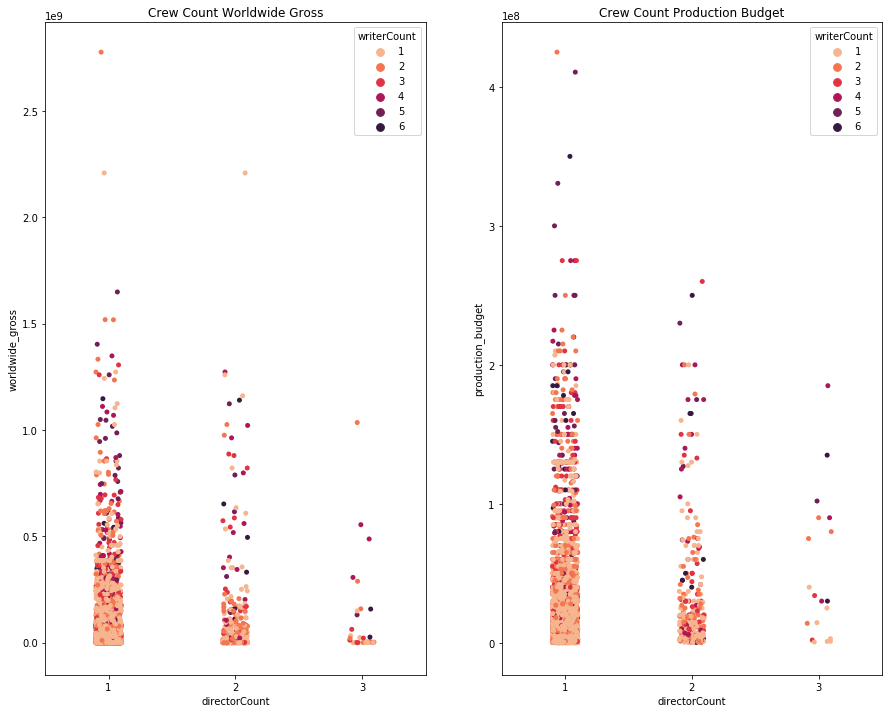

In [15]:
newfig = plt.figure(figsize = (15,12))
ax = newfig.add_subplot(121, title='Crew Count Worldwide Gross')
ax2 = newfig.add_subplot(122, title='Crew Count Production Budget')
sns.catplot(x='directorCount', y = 'worldwide_gross', hue = 'writerCount',  data = refinedcounts, palette= 'rocket_r' , ax = ax)
sns.catplot(x='directorCount', y = 'production_budget', hue = 'writerCount',  data = refinedcounts.query('production_budget > 0'), palette= 'rocket_r', ax = ax2)

plt.close(2)
plt.close(3)

Now this side by side comparison is interesting because it seems that a films gross performance has a correlation to its overall budget regardless of crew size.

## Is There a Difference Between Directors and Writers Budget/Gross?

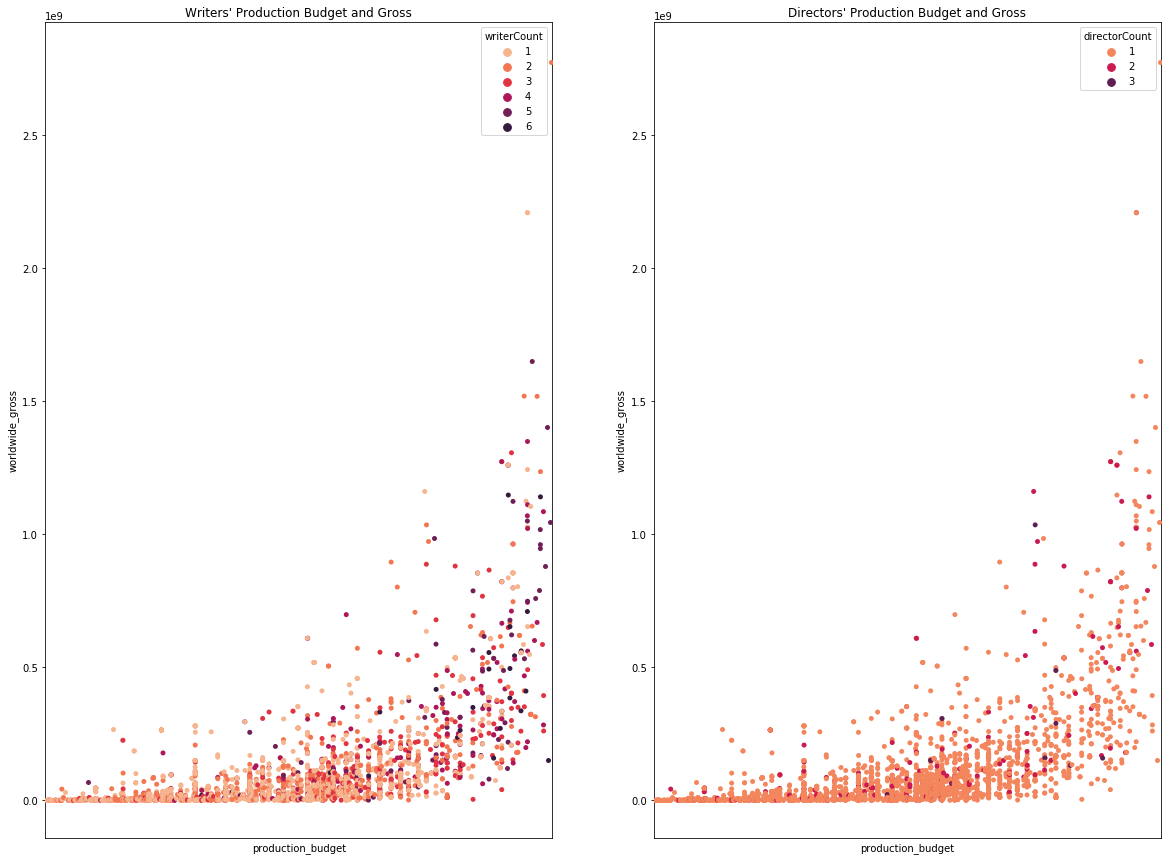

In [14]:
newfig = plt.figure(figsize = (20,15))
ax = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)
ax.set_title("Writers' Production Budget and Gross")
ax2.set_title("Directors' Production Budget and Gross")
sns.catplot(x='production_budget', y = 'worldwide_gross', hue = 'writerCount',  palette= 'rocket_r', data = refinedcounts.query('production_budget > 0'), ax = ax)
sns.catplot(x='production_budget', y = 'worldwide_gross', hue = 'directorCount',  palette= 'rocket_r', data = refinedcounts.query('production_budget > 0'), ax = ax2)
plt.setp(ax, xticks = [])
plt.setp(ax2, xticks = [])
plt.close(2)
plt.close(3)

Interesting! There does seem to be a slight trend to risk/reward. It also seems like a single director is more likely to provide a greater result. In terms of writers, while it may be tricky to see at first glance, our 4 writers do seem to be providing good results.

## Lets simplify things even further and see what our data for films with only one director and 1-4 writers looks like

In [17]:
simplified = refinedcounts[(refinedcounts.directorCount < 2) & (refinedcounts.writerCount < 5)]

#### Our breakdown here shows that we have a decent amount of data still available

In [18]:
simplified.groupby('writerCount').count()

index  domestic_gross  foreign_gross  production_budget  \
writerCount                                                            
1             2280            2280           2280               2280   
2             1298            1298           1298               1298   
3              623             623            623                623   
4              254             254            254                254   

             worldwide_gross  movie_name  genresList  directorCount  
writerCount                                                          
1                       2280        2280        2280           2280  
2                       1298        1298        1298           1298  
3                        623         623         623            623  
4                        254         254         254            254

In [19]:
test = simplified.groupby('writerCount')[['production_budget', 'worldwide_gross']].mean()
test

production_budget  worldwide_gross
writerCount                                    
1                 1.758136e+07     4.945032e+07
2                 1.990699e+07     6.227759e+07
3                 2.627944e+07     7.737667e+07
4                 3.935118e+07     1.227105e+08

Is this the same correlation we saw above?
## Lets plot this data to see how it looks

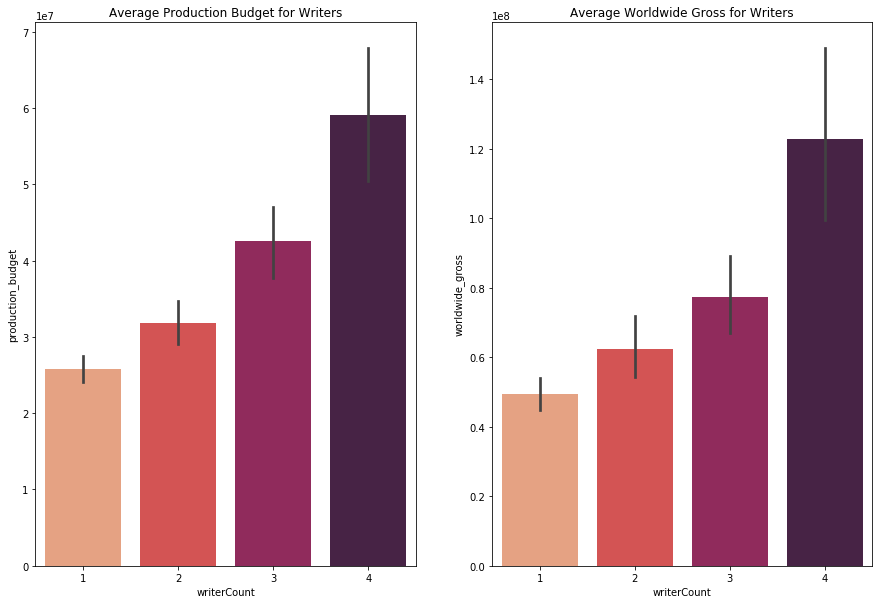

In [24]:
newfig = plt.figure(figsize = (15,10))
ax = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)
ax.set_title("Average Production Budget for Writers")
ax2.set_title("Average Worldwide Gross for Writers")
sns.catplot(x='writerCount', y = 'production_budget', kind = 'bar', palette= 'rocket_r', data = simplified.query('production_budget > 0'), ax = ax)
sns.catplot(x='writerCount', y = 'worldwide_gross', kind = 'bar', palette= 'rocket_r',  data = simplified, ax = ax2)
plt.close(2)
plt.close(3)

### Initial Conclusion
It does appear to follow the same trend as above indicating that with greater investments in the production budget, there are greater chances at increasing our total gross. This also shows what I think is the sweet spot for our potential crew size for a new film. Limiting ourselves to one director and no more than four writers should provide the optimal ROI. The more writers added to a film does seem to increase the amount of potential variance both in terms of budget and gross which is why I would recommend limiting any potential film crew to the above ranges at least until the studio is established or more data can be collected.

## After identifying our top genres, let's see how they compare to what we learned about crew sizes above

In [21]:
refined =final.loc[(final['Genre'] == 'Drama')|(final['Genre'] == 'Adventure')|
                    (final['Genre'] == 'Animation')|(final['Genre'] == 'Action')|
                    (final['Genre'] == 'Musical')]

In [22]:
refined = refined[(refined.Director_Count < 4) & (refined.Writer_Count < 9)]

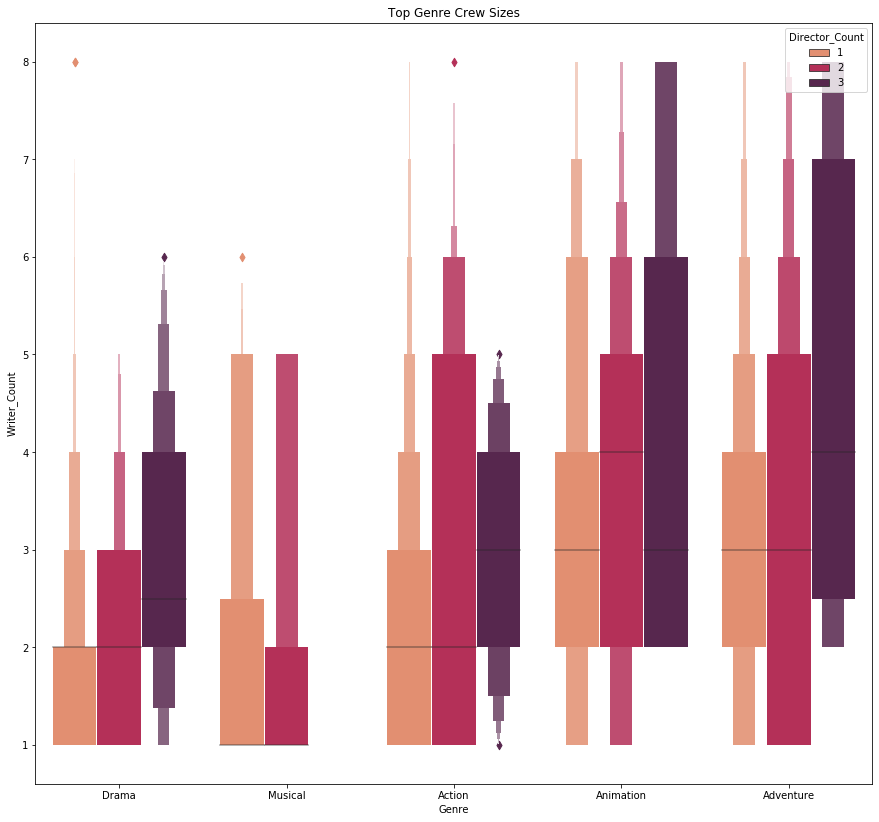

In [23]:
fig, ax = plt.subplots(figsize = (15,14))
sns.catplot(x='Genre', y='Writer_Count', hue='Director_Count' ,kind='boxen',  data=refined, palette= 'rocket_r', ax=ax)
ax.set_title('Top Genre Crew Sizes')
plt.close(2)

## Conclusion
After identifying our targeted crew size and comparing to our top recommended genres it all seems to line up. While the writer count does vary significantly with multiple directors, the majority of these genres that stuck with one director had on average 1-3 writers. Depending on the genre of film chosen to produce, we should use this data to further hone the number of writers we choose to hire.